<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PowerSwitchingDevices_MOSFET_TransferCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Transfer Curve of Power MOSFET
</h1></b>

Dr. Bingsen Wang

1/1/2024
</center>

#Transfer Conductance

In active region, the drain current $i_D$ is independent from the drain-source voltage and only depends on the gate-source voltage.
$$ i_D =  K(v_{GS}-V_{th})^2 \tag{1}$$
where $K$ is a constant determined by the physical parameters of the device.

The slope of the $i_D$-$v_{GS}$ curve is the **transfer conductance** $g_m$
$$g_m = \frac{\partial i_D}{\partial v_{GS}}\tag{2}$$

#Python Code
The Python code illustrates the transfer conductance power MOSFETs.

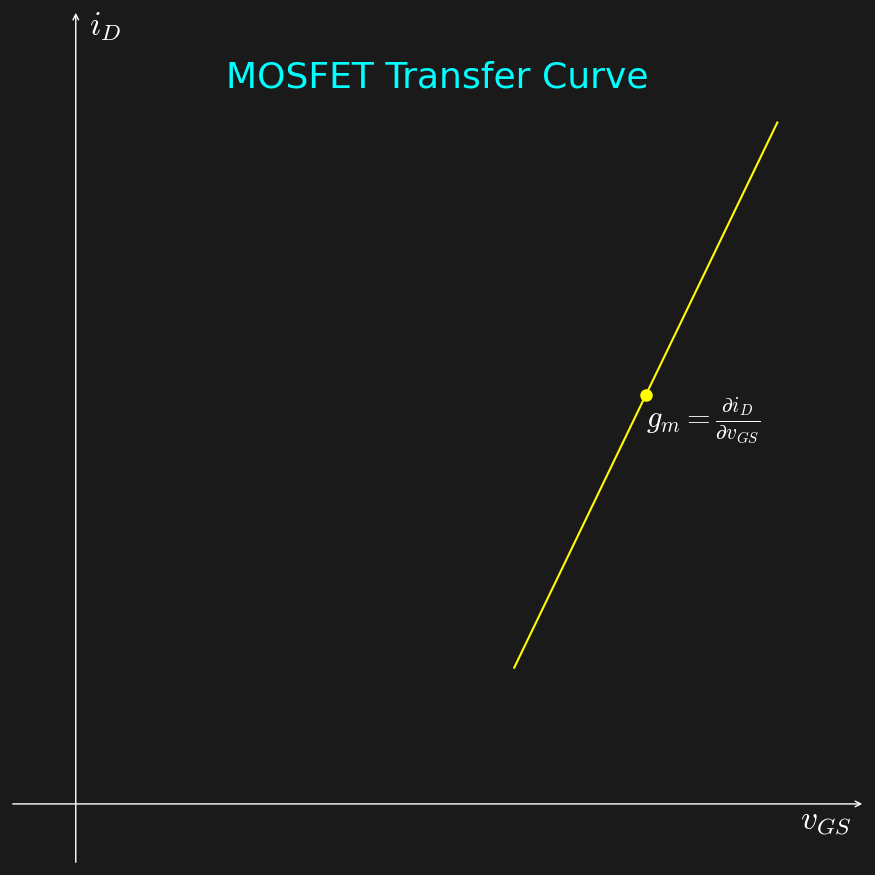

In [39]:
import matplotlib
from os import linesep
from numpy import linspace,logspace,exp,log,fft,pi,arccos,cos,heaviside
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def iD_transfer(vGS,Vth,K): #ohmic and active regions
  return K*(vGS - Vth)**2*heaviside(vGS-Vth,0)

def gm(vGS,Vth,K):
  vGS_tan = linspace(vGS-3,vGS+3,2)
  iD_tan = (vGS_tan - vGS)*2*K*(vGS-Vth) +  K*(vGS - Vth)**2
  return vGS_tan,iD_tan,

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
Nf = 250
Vth = 4
K=1 #determined by phsysical parameters such as material and device geometry
vGS = linspace(0,15,Nf)
iD = iD_transfer(vGS,Vth,K)
vGS_max = max(vGS)
iD_max = max(iD)
vGS_t = linspace(Vth, 13,Nf) # series for plotting the tangent line

#set up figures
fig = plt.figure(figsize=(9,9),facecolor=clst[-1])
ax_frame = [[0, 0, .95, .95], [-.1,1.2], [-.1,1.3]]# [pos-boundary, xlim, ylim]
xn,xm,yn,ym = ax_frame[1]+ax_frame[2]
ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none',) #no face color
ax.axis('off')
ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis
ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis
ax.text(xm-.02,0,r'$v_{GS}$',size=24,va='top',ha='right',color=clst[-2]) #x-axis label
ax.text(.02,ym,r'$i_{D}$',size=24,va='top',color=clst[-2]) #x-axis label
# ax.text(.7,1,'MOSFET Transfer Curve',ha='center',size=36,color=clst[2])
ax.set_title('MOSFET Transfer Curve',y=.9,ha='center',size=26,color=clst[2])
line_iD = ax.plot([],[],lw=3,color=clst[1])[0]
line_tangent = ax.plot([],[],lw=1.5,color=clst[4])[0]
line_dot = ax.plot([],[],ls='',marker='o',markersize = 8, color=clst[4])[0]
txt_gm = ax.text(0,0,r'$g_m=\frac{\partial i_D}{\partial v_{GS}}$',size=22,
                 color=clst[-2],va='top',alpha=0)
# animation function. This is called sequentially
def animate(i):
  ii = i%Nf
  k = int(i/Nf)
  if k==0:
    line_iD.set_data(vGS[:ii+1]/vGS_max,iD[:ii+1]/iD_max)
  else:
    vGS_tan,iD_tan = gm(vGS_t[ii],Vth,K)
    line_tangent.set_data(vGS_tan/vGS_max,iD_tan/iD_max)
    line_dot.set_data([vGS_t[ii]/vGS_max],[iD_transfer(vGS_t[ii],Vth,K)/iD_max])
    txt_gm.set_position((vGS_t[ii]/vGS_max,iD_transfer(vGS_t[ii],Vth,K)/iD_max))
    txt_gm.set_alpha(1.0)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*2, interval=20)
# anim #uncomment to generate animation in the output area
anim.save("MOSFET_transferConductance.mp4", fps=50, dpi = 120) #uncomment to save